In [105]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import sys
import mapclassify

In [106]:
data1 = pd.read_excel('/Users/hoperuse/summer2021internship/AP Evictions/2021-07-02-gather-m0_output_screened.xlsx')

# DATA SOURCE: https://www.mass.gov/info-details/massgis-data-municipalities#displaying-the-data-
municipalities_map = gpd.read_file('/Users/hoperuse/summer2021internship/AP Evictions/townssurvey_shp/TOWNSSURVEY_POLY.shp')

In [107]:
zipcodes_gdf = gpd.read_file('/Users/hoperuse/Desktop/AP Spark/zipcodes_nt/ZIPCODES_NT_POLY.shp')

In [109]:
df = data1.pivot_table(index='property_address_zip',values='case_number',aggfunc=len)
df=df.rename(columns={'property_address_zip':'POSTCODE'})
df=df.reset_index().rename(columns={'property_address_zip':'POSTCODE','case_number':'num_cases'})
df

zipcodes_gdf_merge = zipcodes_gdf.merge(df, on='POSTCODE', how='left')

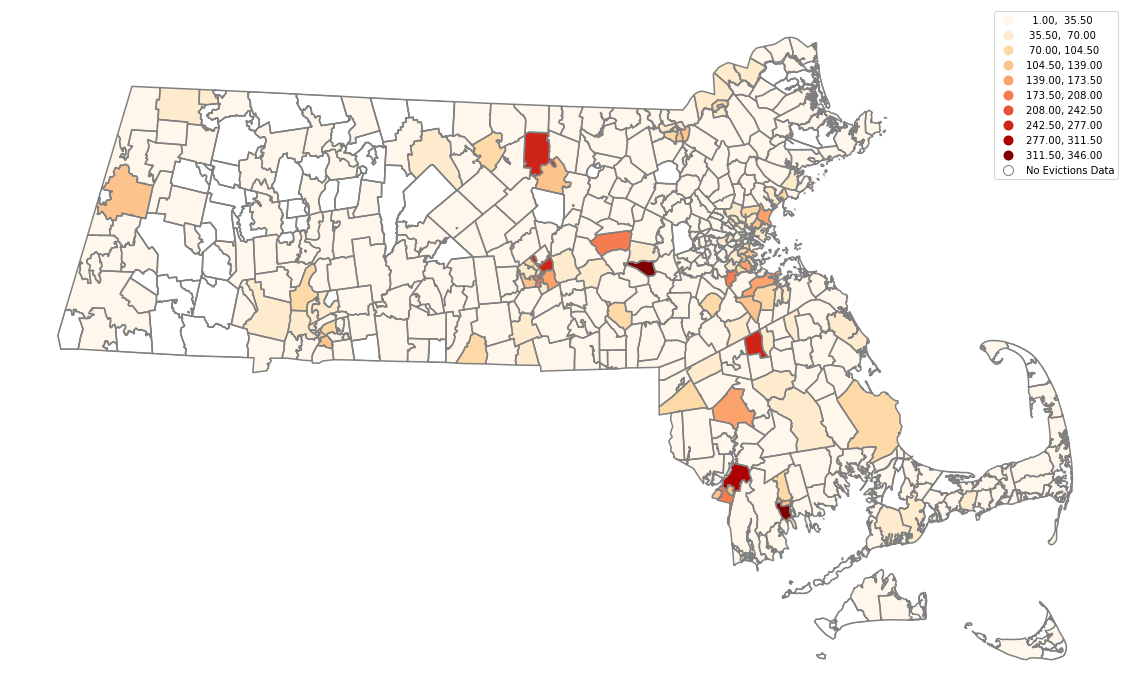

In [110]:
fig,ax = plt.subplots(figsize=(20,20))
ax.axis('off')
zipcodes_gdf.boundary.plot(ax=ax, edgecolor='gray')
zipcodes_gdf_merge.plot(ax=ax, cmap='OrRd',column='num_cases',legend=True, scheme='equal_interval',k=10,missing_kwds={
"color": "white","edgecolor": "grey", "label": "No Evictions Data",     })
plt.savefig('evictions_cases_by_zipcode.jpg')

In [111]:
erap = pd.read_excel('/Users/hoperuse/summer2021internship/AP Evictions/ERAP Past Payments.xlsx')
erap_vals = erap.pivot_table(index='Unit ZIP', values = 'Actual Individual Payment', aggfunc=sum)
erap_vals = erap_vals.reset_index().rename(columns={'Unit ZIP':'POSTCODE','Actual Individual Payment':'ERAP_Total'})



In [112]:
zipcodes_gdf.POSTCODE = zipcodes_gdf.POSTCODE.astype(float)
map_data = zipcodes_gdf.merge(erap_vals, on='POSTCODE', how='left')


In [113]:
raft = pd.read_excel('/Users/hoperuse/summer2021internship/AP Evictions/RAFT Past Payments.xlsx')
raft_vals = erap.pivot_table(index='Unit ZIP', values = 'Actual Individual Payment', aggfunc=sum)
raft_vals = raft_vals.reset_index().rename(columns={'Unit ZIP':'POSTCODE','Actual Individual Payment':'RAFT_Total'})
map_data = map_data.merge(raft_vals, on='POSTCODE', how='left')


In [114]:
map_data['Asst_Total'] = map_data.RAFT_Total + map_data.ERAP_Total

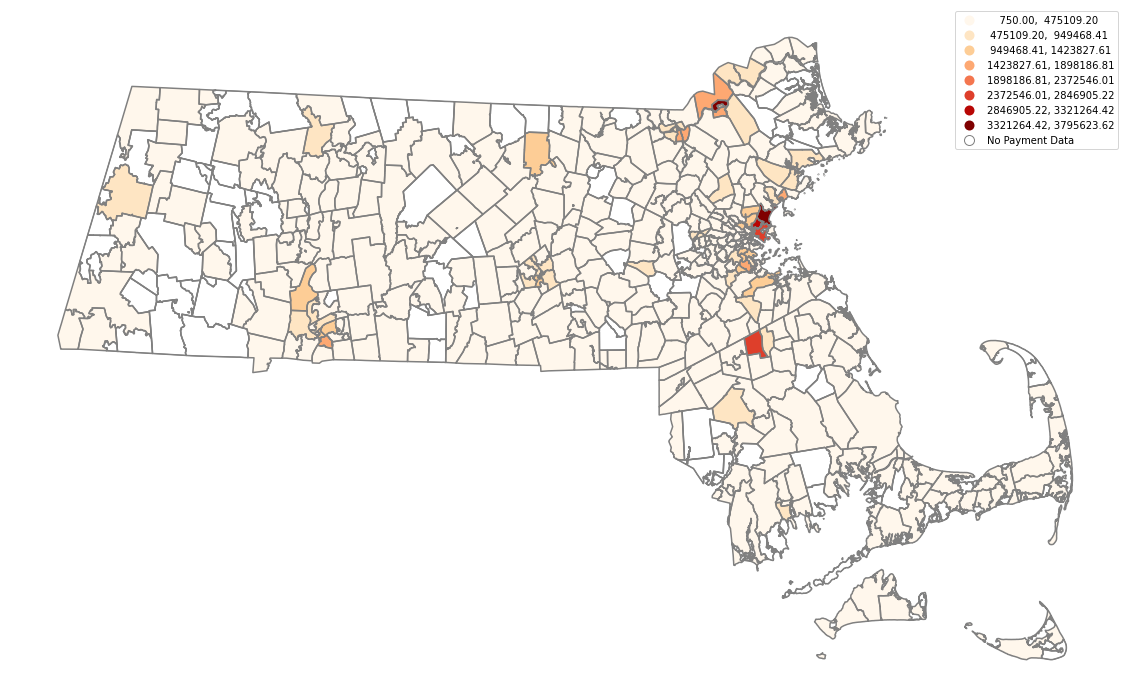

In [115]:
fig,ax = plt.subplots(figsize=(20,20))
ax.axis('off')
zipcodes_gdf.boundary.plot(ax=ax, edgecolor='gray')
map_data.plot(ax=ax, cmap='OrRd',column='ERAP_Total',legend=True, scheme='equal_interval',k=8,missing_kwds={
"color": "white","edgecolor": "grey", "label": "No Payment Data",     })
plt.savefig('erap_payments_by_zipcode.jpg')

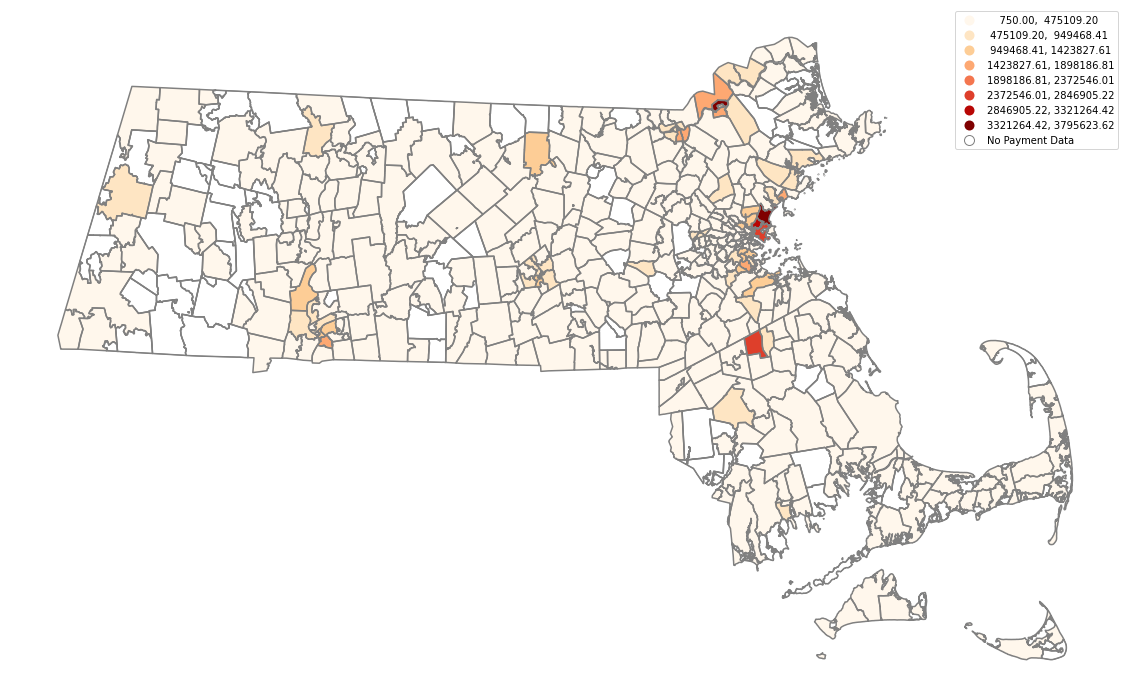

In [116]:
fig,ax = plt.subplots(figsize=(20,20))
ax.axis('off')
zipcodes_gdf.boundary.plot(ax=ax, edgecolor='gray')
map_data.plot(ax=ax, cmap='OrRd',column='RAFT_Total',legend=True, scheme='equal_interval',k=8,missing_kwds={
"color": "white","edgecolor": "grey", "label": "No Payment Data",     })
plt.savefig('raft_payments_by_zipcode.jpg')

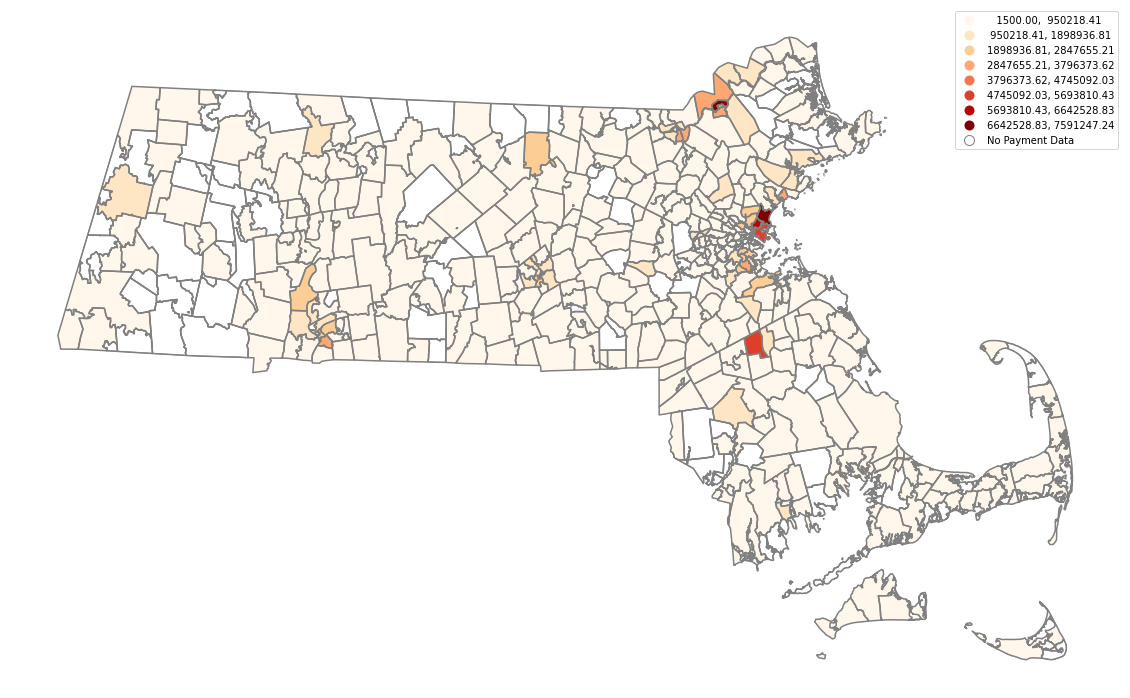

In [117]:
fig,ax = plt.subplots(figsize=(20,20))
ax.axis('off')
zipcodes_gdf.boundary.plot(ax=ax, edgecolor='gray')
map_data.plot(ax=ax, cmap='OrRd',column='Asst_Total',legend=True, scheme='equal_interval',k=8,missing_kwds={
"color": "white","edgecolor": "grey", "label": "No Payment Data",     })
plt.savefig('total_payments_by_zipcode.jpg')

In [128]:
print("Earliest Evictions Filing Date: " + str(min(data1.file_date)),"\nLatest Evictions Filing Date: " + str(max(data1.file_date)))
print("Total Evictions During Period: ", len(data1.case_number.notna()))
print("Zipcode with the most evictions: ", max(data1.pivot_table(index='property_address_zip', values='case_number', aggfunc=len)['case_number'].index))


Earliest Evictions Filing Date: 2020-10-19 00:00:00 
Latest Evictions Filing Date: 2021-06-18 00:00:00
Total Evictions During Period:  16874
Zipcode with the most evictions:  span


In [131]:
print("Total ERAP Funding: ", erap['Actual Individual Payment'].sum())
print('Number of ERAP Payments: ', len(erap['Actual Individual Payment'].notna()))
print("Total RAFT Funding: ", raft['Actual Individual Payment'].sum())
print('Number of RAFT Payments: ', len(raft['Actual Individual Payment'].notna()))


Total ERAP Funding:  96241594.1
Number of ERAP Payments:  36107
Total RAFT Funding:  127605677.11
Number of RAFT Payments:  68973
